
<h1 style="color:blue;text-align: center;">PERCEPTRON</h1>

Perceptron is a single layer neural network used for learning a binary classifier using a threshold function. During training the weights and bias are initialized randomly and examples are then presented. These examples are weighted by the corresponding weights and bias to produce a weighted sum and then transformed through a threshold function to produce an output.

let define the weighted sum to be $V=\sum_{i}^{n}W^{T}X+b$ and the threshold function to be $F$. The threshold function classify an output as belonging to either the positive class (class A or 1) or the negative class (class B or 0) using the using the defined function below

$$F=\begin{cases} 1 \quad if \ \ V  \geq 0 \\ 0 \quad otherwise\end{cases}$$

<h1 style="color:blue;text-align: center;">MULTILAYER PERCEPTRON (Deep feedforward networks)</h1>

A multilayer perceptron (MLP) is a neural network composed of more than one perceptron. They are composed of an input layer, an, arbitrary number of hidden layers and output layer which are stacked on top of each other. An output from a layer serves as an imput for the next layer above it and in that order, until the model generate a output from the output layer. The output from the output layer serve as the predicted output by the model. MLP is defined as

$$ h_1 = \sigma(W_1\boldsymbol{x} + b_1) $$
$$ h_2 = \sigma(W_2\boldsymbol{h_1} + b_2) $$
$$ h_3 = \sigma(W_3\boldsymbol{h_2} + b_3) $$
$$...$$
$$ h_n = \sigma(W_n\boldsymbol{h_{n-1}} + b_n) $$
$$ \hat{y} = \phi (W_y \boldsymbol{h}_n + b_y)$$ $$OR$$
$$ \hat{y} = W_y \boldsymbol{h}_n + b_y$$

where $\sigma$ is some nonlinear activation functions. $\phi$ is also a nonlinear function which depends on the target variable. Note that each layer requires its own set of parameters and all these parameters are updated during training. For each layer the model first calculate its value by first applying a linear function before applying an element-wise nonlinear activation function. 



<b style="color:red">"The final layer of a feedforward network is called the output layer. During neural network training, we drive f(x) to match f∗(x). The training data provides us with noisy, approximate examples of f ∗(x) evaluated at different training points. Each example x is accompanied by a label y ≈ f ∗(x). The training examples specify directly what the output layer must do at each point x; it must produce a value that is close to y. The behavior of the other layers is not directly specified by the training data. The learning algorithm must decide how to use those layers to produce the desired output, but the training data does not say what each individual layer should do. Instead, the learning algorithm must decide how to use these layers to best implement an approximation of f∗. Because the training data does not show the desired output for each of these layers, these layers are called hidden layers. The dimensionality of these hidden layers determines the width of the model"</b>


<b>(source: From the book, Deep Learning by Ian Goodfellow,Yoshua Bengio and Aaron Courville Chapter 6 (Deep Feedforward Networks) page 169) </b>

<h1 style="background-color:DodgerBlue;"><img src="images/mlp.png" alt="Smiley face" style="float:right;width:400px;height:300px;">A multilayer perceptron with 4 inputs, a hidden layer with 4 hidden units and 2 outputs</h1>


<h1 style="color:blue;text-align: center;">Activation Functions</h1>

Activation functions are used to introduce non-linearity to the neural network without neural networks could do little to learn non-linear functions and as such play important roles in neural networks. A chosen activation function for a node is responsible for transforming the summed weighted input of that node and it determines the output of that node. These activation functions help the networks in predicting a desirable output based on the learned patterns within datasets by the parameters. Activation functions are also chosen for input-hidden layers and hidden-output layer and a primary considerations for choosing activation function the differentiability nature of the function since back-propagated used in updating model parameters requires the gradient of the activation function. There are different types of activation functions but we will only briefly survey some common activation functions.

<h1 style="color:blue;text-align: center;">Reactified Linear Unit (ReLU) Function</h1>

Relu has become the default activation function for many types of neural networks due to its simplicity of implementation, easier to train and often achieves better performance on a variety of predictive tasks. When apply to an output from a linear transformation yields a nonlinear transformation and this simple nonlinear transformation is defined to returns 0 if it receives a negative input (discards all negative elements) and if a positive value is received, returns the same the positive value, that is given the element $\textbf{z}$, the function is defined as the maximum of that element and 0.

$$Relu(z)=max(0,z)  $$



Using inputs X defined as
$$X=\left [\begin{array}{ccc}
0& 0 \\
0 & 1\\
2 &5 \\
4&-3
\end{array}\right ]$$
and a hidden layer h defined by
$$h=f(WX+b0)$$

where 
$f=Relu$
$$b0=\left[\begin{array}{ccc}
0\\
-1 
\end{array}\right]$$

$$W=\left [\begin{array}{ccc}
1 &5\\
3 &1
\end{array}\right]$$

and an output layer defined by

$$ O=wh+b1 $$
where
$$w=\left[\begin{array}{ccc}
2\\
3
\end{array}\right]$$
$$b1=\left[\begin{array}{ccc}
0\\
0 
\end{array}\right]$$

we want to compute the output

In [6]:
import numpy as np
import tensorflow as tf

In [7]:
b0=tf.constant([0,-1])
W=tf.constant([[1,5],[3,1]])
w=tf.constant([[2],[3]])

<h1>transpose(input, dim0, dim1) </h1>
 
 dim0 (int): the first dimension to be transposed

dim1 (int): the second dimension to be transposed

In [8]:
x=tf.constant([[0,0,2,4],[0,1,5,-3]])
x=tf.transpose(x)
x

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[ 0,  0],
       [ 0,  1],
       [ 2,  5],
       [ 4, -3]])>

In [9]:
h=x@W+b0
h

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[ 0, -1],
       [ 3,  0],
       [17, 14],
       [-5, 16]])>

In [12]:
tf.math.maximum(0,h)

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[ 0,  0],
       [ 3,  0],
       [17, 14],
       [ 0, 16]])>

In [13]:
h_relu=tf.maximum(0,h)
h_relu

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[ 0,  0],
       [ 3,  0],
       [17, 14],
       [ 0, 16]])>

In [14]:
output=h_relu@w
output

<tf.Tensor: shape=(4, 1), dtype=int32, numpy=
array([[ 0],
       [ 6],
       [76],
       [48]])>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def plot_activation(x_data,y_data,xlabel='x',ylabel='y'):
    plt.figure(figsize=(4,3))
    plt.plot(x_data.numpy(),y_data.numpy())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

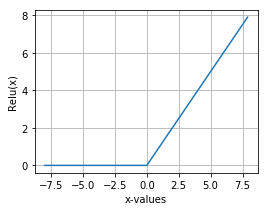

In [20]:
x=tf.range(-8.0,8.0,0.1)
y=tf.maximum(x,0)
plot_activation(x,y,xlabel='x-values',ylabel='Relu(x)')

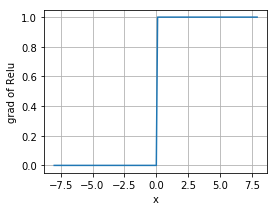

In [21]:
x=tf.range(-8.0,8.0,0.1)
with tf.GradientTape() as g:
    g.watch(x)
    y=tf.maximum(x,0)
    x_grad=g.gradient(y,x)
    
plot_activation(x, x_grad, 'x', 'grad of Relu')

# NOTE  
## Relu has many variants including 
$\bullet$LeakyReLU 

$\bullet$parameterized ReLU (pReLU)


<h1 style="color:blue;text-align: center;">Sigmoid Function</h1>

The sigmoid function transforms its inputs, which values lie in the domain R, to outputs that lie
on the interval (0; 1). The function has a lower bound of $\textbf{0}$ and an upper bound of $\textbf{1}$ which means that the function output values range is  [0,1] Because it squashes any input in the range (-inf, inf) to some value in the range (0, 1), the sigmoid function is often called a squashing function: 
The function is defined as

$$\boldsymbol{\sigma(z)}=\frac{1}{1+\exp(-z)} $$ 

In [ ]:
tf.sigmoid()

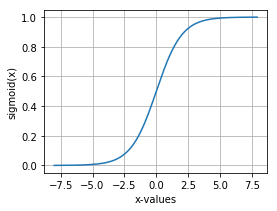

In [24]:
x=tf.range(-8.0,8.0,0.1)
y=tf.sigmoid(x)
plot_activation(x,y,xlabel='x-values',ylabel='sigmoid(x)')

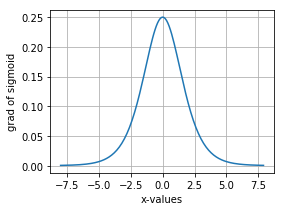

In [25]:
x=tf.range(-8.0,8.0,0.1)
with tf.GradientTape() as g:
    g.watch(x)
    y=tf.sigmoid(x)
    x_grad=g.gradient(y,x)
plot_activation(x,x_grad,xlabel='x-values',ylabel='grad of sigmoid')

<h1 style="color:blue;text-align: center;">Hyperbolic Tangent (Tanh) Function</h1>

The hyperbolic tangent function denoted as tanh(z) function is
a re-scaled version of the logistic sigmoid function, which is bounded below and above by [−1; 1] and
hence output values within the range of [−1; 1]. The function is defined as

$$tahn(z)=\frac{exp(z)-exp(-z)}{exp(z)+exp(-z)}=\frac{1-exp(-2z)}{1+exp(-2z)}$$

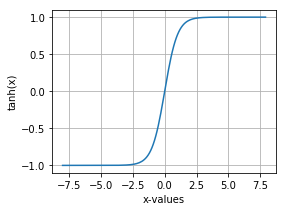

In [26]:
x=tf.range(-8.0,8.0,0.1)
y=tf.tanh(x)
plot_activation(x,y,xlabel='x-values',ylabel='tanh(x)')

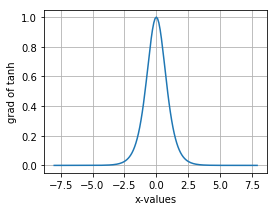

In [27]:
x=tf.range(-8.0,8.0,0.1)
with tf.GradientTape() as g:
    g.watch(x)
    y=tf.tanh(x)
    x_grad=g.gradient(y,x)
plot_activation(x,x_grad,xlabel='x-values',ylabel='grad of tanh')

# note
$$ tanh(x)+1=2sigmoid(2x)$$

In [28]:
np.round(np.tanh(1)+1,3)

1.762

In [29]:
def f(x):
    return 2/(1+np.exp(-2*x))
np.round(f(1),3)

1.762

<h1 style='text-align:center;'>Implementation of Multilayer Perceptron from Scratch using Softmax as the output activation function </h1>

<h1>importing the needed packages</h1>

In [1]:
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Loading the data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
batch_size = 256
train_data = tf.data.Dataset.from_tensor_slices((x_train.reshape(60000, 784).astype("float32") / 255,
                                              y_train.astype("float32")))
train_data = train_data.shuffle(buffer_size=1024).batch(batch_size)



test_data = tf.data.Dataset.from_tensor_slices((x_test.reshape(10000, 784).astype("float32") / 255,
                                         y_test.astype("float32")))
test_data = test_data.shuffle(buffer_size=1024).batch(batch_size)

# Making new layers and models via subclassing

Creating layers by subclassing the keras Layer class this layer encapsulates weights

In [4]:
class Linear(tf.keras.layers.Layer):
    def __init__(self, units=20, input_dim=32,**kwargs):
        super().__init__(**kwargs)
        self.w = self.add_weight(shape=(input_dim, units), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(units,), initializer="zeros", trainable=True)

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

## MLP
MLP with two hidden layers each with 256 hidden units in the first layer 100 hidden units in the second hidden layer and since the target variable contain 10 categories we will set the number of output to 10

In [5]:
num_inputs, num_outputs, num_hidden_1,num_hidden_2 = 784, 10, 256,200
class MLP(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
        self.layer1=Linear(input_dim=num_inputs,units=num_hidden_1)
        self.layer2=Linear(input_dim=num_hidden_1,units=num_hidden_2)
        self.layer3=Linear(input_dim=num_hidden_2,units=num_outputs)
    def call(self,inputs):
        #h_1=tf.nn.relu(self.layer1(inputs))
        h_1=tf.maximum(self.layer1(inputs),0)
        #h_2=tf.nn.relu(self.layer2(h_1))
        h_2=tf.maximum(self.layer2(h_1),0)
        #output=tf.nn.softmax(self.layer3(h_2))
        output=tf.math.softmax(self.layer3(h_2))
        return output

In [6]:
mlp=MLP()

In [7]:
for x,y in test_data:
    print(y.shape)
    break

(256,)


In [8]:
for x,y in test_data:
    y=y.numpy()
    y=y.astype('int64')
    print(y.dtype)
    print(tf.keras.backend.argmax(tf.nn.softmax(x)).dtype)
    break
    

int64
<dtype: 'int64'>


# evaluation function to evaluate our model

In [9]:
def evaluate_accuracy(data_iterator, net):
    pred_correct = 0.
    for i ,(data,label) in enumerate(data_iterator):
        output=net(data)
        output=output.numpy()
        pred=np.argmax(output,axis=1)
        pred_correct=np.sum(pred==label)
        return (pred_correct/len(data))

In [10]:
# Instantiate a metric object
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Training loop

In [11]:
epochs=10
for e in range(epochs):
    train_acc,test_acc=0,0
    cumulative_loss = 0
    # Iterate over the batches of a dataset.
    for step, (x, y) in enumerate(train_data):
        with tf.GradientTape() as tape:
            logits = mlp(x)
            # Compute the loss value for this batch.
            loss_value = loss_fn(y, logits)
        # Update the state of the `accuracy` metric.
        acc_c=accuracy.update_state(y, logits)
        # Update the weights of the model to minimize the loss value.
        gradients = tape.gradient(loss_value, mlp.trainable_weights)
        optimizer.apply_gradients(zip(gradients, mlp.trainable_weights))
    train_accuracy = evaluate_accuracy(train_data, mlp)
    test_accuracy = evaluate_accuracy(test_data, mlp)
    train_acc+=train_accuracy
    test_acc+=test_accuracy
    print('epoch %d, loss %f,train acc %f,test acc %f'%(e,loss_value,train_acc,test_acc))     
    # Result the metric's state at the end of an epoch
    accuracy.reset_states()

epoch 0, loss 1.578574,train acc 0.847656,test acc 0.816406
epoch 1, loss 1.572802,train acc 0.878906,test acc 0.863281
epoch 2, loss 1.574329,train acc 0.878906,test acc 0.859375
epoch 3, loss 1.473423,train acc 0.972656,test acc 0.980469
epoch 4, loss 1.476168,train acc 0.980469,test acc 0.964844
epoch 5, loss 1.488854,train acc 0.984375,test acc 0.949219
epoch 6, loss 1.471262,train acc 0.976562,test acc 0.953125
epoch 7, loss 1.471734,train acc 0.964844,test acc 0.968750
epoch 8, loss 1.473144,train acc 0.964844,test acc 0.953125
epoch 9, loss 1.474965,train acc 0.988281,test acc 0.976562
